# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>Escreva seu nome aqui</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta - pode consultar suas anotações, a web, o que quiser, menos perguntar para outros ou para as AIs. Faça o seu trabalho de maneira ética!

ChatGPT para perguntas teóricas não é permitido. CoPilot para código é permitido.

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)


---

# Seção: Fundamentos


---

**Questão 1**: (2.5 pts) Matrizes e SVD



(a) (0.5 pts) Vamos criar uma matriz $A_{100 \times 4}$ de zeros:

In [3]:
# Criando uma matriz de zeros de tamanho 100x4.
A = np.zeros((100, 4))
A.shape

(100, 4)

In [4]:
# As primeiras 5 linhas da matriz A.
A[:5, :]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Agora preencha a matriz A com as seguintes especificações:

- A coluna $1$ tem uma lista de inteiros de $1$ a $100$. Pode usar `list` e `range` padrão do Python, ou pode usar `np.arange` ou `np.linspace` (que provavelmente é o jeito mais fácil).
- A coluna $2$ tem apenas o valor $1$ em todas as posições
- A coluna $3$ tem os inteiros de $101$ a $200$, assim como foi feito para a coluna $1$
- A coluna $4$ tem números aleatórios com distribuição gaussiana padrão (ou seja, média zero e desvio padrão $1$). Use a função `np.random.normal`.

Nota: lembre-se que em Matemática os índices começam em $1$, mas em Python (e em C, C++, JavaScript, Java, Rust, Go, etc.) os índices começam em zero, ok? Portanto $A_{5,3}$ em Matemática é `A[4,2]` em Python.


---

**Resposta**

In [5]:
A[:,0] = np.arange(1,101)
A[:,1] = 1
A[:,2] = np.arange(101,201)
A[:,3] = np.random.normal(0,1,100)
A[:5,:]


array([[  1.        ,   1.        , 101.        ,   0.49671415],
       [  2.        ,   1.        , 102.        ,  -0.1382643 ],
       [  3.        ,   1.        , 103.        ,   0.64768854],
       [  4.        ,   1.        , 104.        ,   1.52302986],
       [  5.        ,   1.        , 105.        ,  -0.23415337]])

---

A célula abaixo calcula a decomposição em valores singulares (SVD - *Singular Value Decomposition*) de $A$:

In [6]:
U, s, Vt = np.linalg.svd(A)

In [7]:
U.shape, s.shape, Vt.shape

((100, 100), (4,), (4, 4))

Responda as perguntas a seguir:

(b) (0.5 pts) Mostre que $U$ e $V$ são ortonormais, ou unitárias. Dica: em Python, o operador `@` multiplica matrizes. Dica: para escrever uma matriz usando poucos dígitos decimais, use o método `.round()` de matrizes - por exemplo, para escrever $M$ com dois dígitos, use `M.round(2)`.

In [8]:
(U @ U.T).round(2), (Vt @ Vt.T).round(2)

(array([[ 1.,  0., -0., ..., -0., -0., -0.],
        [ 0.,  1., -0., ..., -0., -0.,  0.],
        [-0., -0.,  1., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ...,  1.,  0.,  0.],
        [-0., -0., -0., ...,  0.,  1., -0.],
        [-0.,  0., -0., ...,  0., -0.,  1.]]),
 array([[ 1., -0.,  0., -0.],
        [-0.,  1., -0.,  0.],
        [ 0., -0.,  1., -0.],
        [-0.,  0., -0.,  1.]]))


---

**Resposta**

Pela multiplicação da matriz U e V por suas transpostas, é possível identificar a matriz identidade como resultado, as determinando como unitárias

---

(c) (0.5 pts) O array `s` contém apenas uma lista de números ao invés de ser uma matriz $100 \times 4$. Construa uma matriz $S$ que siga o padrão da SVD, ou seja, $1$ bloco diagonal com os valores de `s`, e um bloco de zeros. Dica: use as funções `np.diag`, `np.zeros` e `np.vstack`


---

**Resposta**

In [9]:
ss = np.diag(s)
z = np.zeros((96,4))
ss1 = np.vstack((ss,z))
ss1

array([[1.62954450e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.77160811e+02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.02714908e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.65374191e-15],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e

---

(d) (0.5 pts) Em `s` temos que o menor elemento é efetivamente zero, veja:

In [10]:
s.round(2)

array([1629.54,  177.16,    9.03,    0.  ])

*Baseado na construção de $A$*, explique porque o menor elemento de `s` é zero.


---

**Resposta**

O menor elemento de s é zero, pois as colunas de A são linearmente dependente

---

(e) (0.5 pts) Efetue o produto $\boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^{T}$ e verifique que bate com $A$, a menos de precisão numérica. Dica: use a função `np.allclose` para verificar que dois arrays tem valores muito próximos.


---

**Resposta**

In [11]:
r = U @ ss1 @ Vt
np.allclose(r,A), r[:4,:]

(True,
 array([[  1.        ,   1.        , 101.        ,   0.49671415],
        [  2.        ,   1.        , 102.        ,  -0.1382643 ],
        [  3.        ,   1.        , 103.        ,   0.64768854],
        [  4.        ,   1.        , 104.        ,   1.52302986]]))

---

**Questão 2** (2.0 pts) O algoritmo de minimização por descida do gradiente funciona da seguinte forma:

- Comece por um ponto de partida qualquer
- Loop:
    - Atualize a estimativa do minimo, adicionando um pequeno multiplo (taxa de aprendizagem) do negativo do gradiente.
    - Se a atualização foi negligível, pare o loop

Eis uma implementação:

In [12]:
def gradient_descent(f, g, x0, eta=0.01, tol=1e-6, max_iter=1000):
    """Algoritmo de otimização do gradiente descendente.

    Args:
        f (callable): Função objetivo.
        g (callable): Gradiente da função objetivo.
        x0 (np.ndarray): Ponto inicial.
        alpha (float): Taxa de aprendizado.
        tol (float): Tolerância para o critério de parada.
        max_iter (int): Número máximo de iterações.
    
    Returns:
        np.ndarray: Ponto ótimo.
    """
    x = x0
    for i in range(max_iter):
        x_new = x - eta * g(x)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        print(x)
    if i == max_iter - 1:
        print("Aviso: número máximo de iterações atingido!")
    return x_new

Nesta implementação você passa *funções* `f(x)` e `g(x)` que computam o valor da função a ser otimizada, e o seu gradiente. Por exemplo, vamos minimizar a função $f(x) = x^2 -4 x + 1$. Seu gradiente é apenas uma derivada simples, pois essa função tem apenas uma variável, e vale $g(x) = 2 x - 4$.

In [13]:
def f(x):
    return x**2 - 4*x + 1

def g(x):
    return 2*x - 4

In [14]:
x_plot = np.linspace(-3, 7, 100)
f_plot = f(x_plot)
g_plot = g(x_plot)

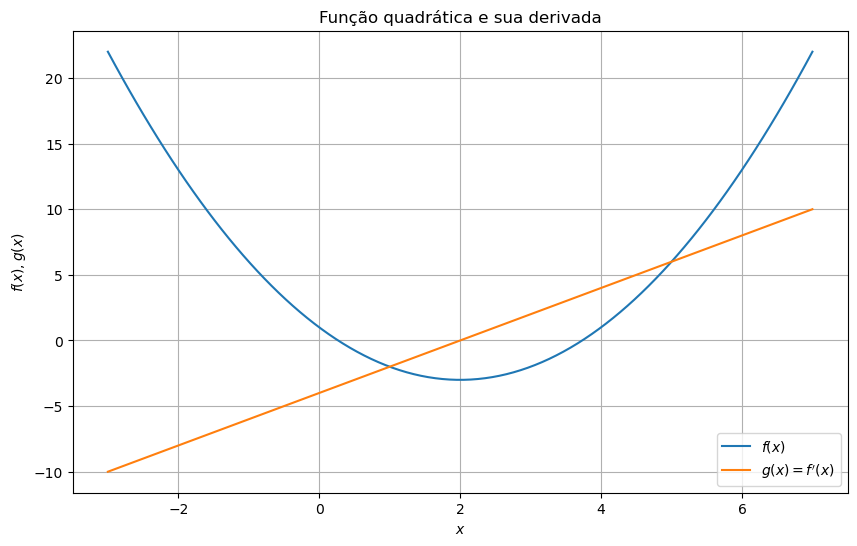

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x_plot, f_plot, label=r'$f(x)$')
plt.plot(x_plot, g_plot, label=r'$g(x) = f^{\prime}(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x), g(x)$')
plt.title('Função quadrática e sua derivada')
plt.legend()
plt.grid()
plt.show()

(a) (0.5 pts) Pelo método analítico, qual o ponto de mínimo de $f(x)$?


---

**Resposta**

Escrever equação... -3

---

(b) (0.5 pts) Usando a função `gradient_descent` acima podemos achar o mínimo numericamente, veja:

In [16]:
x_min = gradient_descent(f, g, -2, eta=0.1, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

-1.2
-0.5599999999999998
-0.04799999999999993
0.3616000000000001
0.6892800000000001
0.951424
1.1611392
1.32891136
1.463129088
1.5705032704000002
1.65640261632
1.725122093056
1.7800976744448
1.82407813955584
1.8592625116446722
1.8874100093157378
1.9099280074525902
1.9279424059620722
1.9423539247696577
1.9538831398157261
1.963106511852581
1.9704852094820648
1.9763881675856518
1.9811105340685216
1.9848884272548173
1.9879107418038537
1.990328593443083
1.9922628747544664
1.9938102998035732
1.9950482398428586
1.996038591874287
1.9968308734994296
1.9974646987995437
1.9979717590396349
1.998377407231708
1.9987019257853664
1.9989615406282932
1.9991692325026347
1.9993353860021077
1.9994683088016862
1.999574647041349
1.999659717633079
1.9997277741064632
1.9997822192851706
1.9998257754281366
1.9998606203425093
1.9998884962740076
1.999910797019206
1.9999286376153649
1.9999429100922919
1.9999543280738334
1.9999634624590668
1.9999707699672533
1.9999766159738026
1.9999812927790421
1.9999850342232337
1.

Vamos achar o mínimo numericamente, usando a função `gradient_descent` acima com `eta = 1e-4`, `tol=1e-6` e `max_iter=1000`. O valor correto não será encontrado:

In [17]:
x_min = gradient_descent(f, g, -2, eta=1e-4, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

-1.9992
-1.99840016
-1.997600479968
-1.9968009598720065
-1.996001599680032
-1.995202399360096
-1.994403358880224
-1.9936044782084479
-1.9928057573128062
-1.9920071961613437
-1.9912087947221113
-1.9904105529631668
-1.9896124708525742
-1.9888145483584037
-1.988016785448732
-1.9872191820916423
-1.986421738255224
-1.985624453907573
-1.9848273290167915
-1.9840303635509882
-1.983233557478278
-1.9824369107667823
-1.981640423384629
-1.980844095299952
-1.980047926480892
-1.9792519168955958
-1.9784560665122166
-1.9776603752989141
-1.9768648432238543
-1.9760694702552095
-1.9752742563611585
-1.9744792015098862
-1.9736843056695843
-1.9728895688084505
-1.9720949908946888
-1.9713005718965098
-1.9705063117821304
-1.969712210519774
-1.96891826807767
-1.9681244844240544
-1.9673308595271697
-1.9665373933552643
-1.9657440858765933
-1.964950937059418
-1.964157946872006
-1.9633651152826317
-1.9625724422595752
-1.9617799277711232
-1.960987571785569
-1.9601953742712117
-1.9594033351963576
-1.9586114545293183


Explique porque isso aconteceu e como resolver esse problema. Dica: pode modificar a função `gradient_descent` para escrever informações diagnósticas conforme o algoritmo avança.


---

**Resposta**

a taxa de aprendizado muito pequena faz com que o novo x fique muito parecido com o x antigo, portanto é necessário mais iterações para alcançar o valor exato. Para resolver este problema, é necessário mais iterações ou um maior eta

---

(c) (0.5 pts) Agora vamos tentar de novo mas com `eta = 1e4`, `tol=1e-6` e `max_iter=1000`. O valor correto não será encontrado:

In [18]:
x_min = gradient_descent(f, g, -2, eta=1e4, tol=1e-6, max_iter=1000)
print(f"O ponto ótimo é {x_min:.2f}.")

79998.0
-1599840002.0
31995200239998.0
-6.3987200959968e+17
1.2796800319984002e+22
-2.5592320959936007e+26
5.118208268777602e+30
-1.0235904716728325e+35
2.0470785842984977e+39
-4.0939524607385656e+43
8.187495526231057e+47
-1.637417230290949e+52
3.2746707188588688e+56
-6.549013970645853e+60
1.309737303989464e+65
-2.619343634248529e+69
5.2384253341336334e+73
-1.0476326825733852e+78
2.095160601878513e+82
-4.190111687696838e+86
8.379804364224906e+90
-1.675877074801339e+95
3.351586561895198e+99
-6.702837965134207e+103
1.34050056464719e+108
-2.6808670792379157e+112
5.3614660717679076e+116
-1.0722395996928638e+121
2.1443719754257583e+125
-4.288529513653974e+129
8.576630174356582e+133
-1.715240268569573e+138
3.430309013112289e+142
-6.860274995323267e+146
1.3719863963147002e+151
-2.743835593989769e+155
5.4873968044201386e+159
-1.0974244869159835e+164
2.194739231383275e+168
-4.389258988843412e+172
8.77807905178794e+176
-1.75552802956707e+181
3.5108805063311835e+185
-7.021409924611734e+189
1.4042

Explique porque isso aconteceu e como resolver esse problema. Dica: pode modificar a função `gradient_descent` para escrever informações diagnósticas conforme o algoritmo avança.


---

**Resposta**

Step é muito grande, portanto

---

(d) (0.5 pts) Vamos explorar agora outra função: $f(x) = x^4 - (52 / 3) x^3 + 108 x^2 - 288 x + 290$. A derivada de $f(x)$ é $g(x) = 4 x^3 - 52 x^2 + 216 x - 288$. Veja os gráficos abaixo.

In [19]:
def f(x):
    return x**4 - (52 / 3) * x**3 + 108 * x**2 - 288 * x + 290


def g(x):
    return 4 * x**3 - 52 * x**2 + 216 * x - 288

In [20]:
x_plot = np.linspace(2, 7, 100)
f_plot = f(x_plot)
g_plot = g(x_plot)

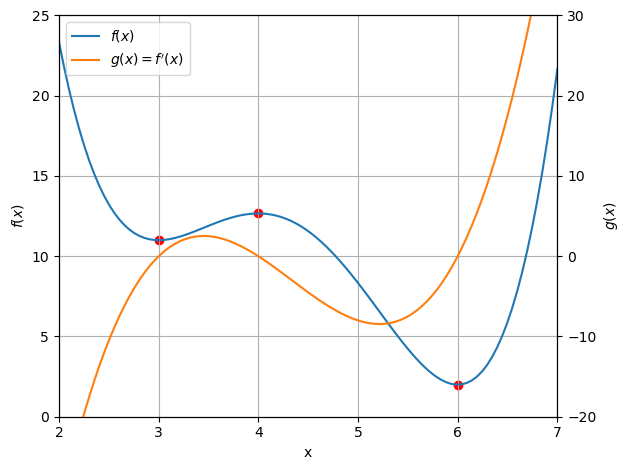

In [21]:
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
lines1 = ax1.plot(
    x_plot,
    f_plot,
    color=color1,
    label=r'$f(x)$',
)
ax1.scatter(
    [3, 4, 6],
    [f(3), f(4), f(6)],
    color='red',
)
ax1.set_xlabel('x')
ax1.set_xlim(2, 7)
ax1.set_ylim(0, 25)
ax1.set_ylabel(r'$f(x)$')

ax2 = ax1.twinx()
color2 = 'tab:orange'
lines2 = ax2.plot(
    x_plot,
    g_plot,
    color=color2,
    label=r'$g(x) = f^{\prime}(x)$',
)
ax2.set_ylim(-20, 30)
ax2.set_ylabel(r'$g(x)$')

lines = lines1 + lines2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
ax1.grid()

fig.tight_layout()
plt.show()

O que aconteceu com o `gradient_descent` se ao buscamos achar o mínimo a partir de $x_{\text{inicial}} = 2$ paramos em $x = 3$ ao invés do ponto ótimo $x = 6$? Explique com suas palavras, e monte um exemplo de código (i.e. chame a função `gradient_descent` com os parâmetros necessários) para demonstrar este fenômeno.


---

**Resposta**

O que aconteceu foi um encontro com um mínimo local da função, que neste caso é diferente do mínimo global

In [22]:
def gradient_descent(f, g, x0, eta=0.01, max_iter=1000):

    x = x0
    for i in range(max_iter):
        x_new = x - eta * g(x)
        if f(x_new)>f(x):
            break
        x = x_new
        print(x)
    if i == max_iter - 1:
        print("Aviso: número máximo de iterações atingido!")
    return x_new

x_min = gradient_descent(f, g, 2)
print(f"O ponto ótimo é {x_min:.2f}.")

2.32
2.4881612800000004
2.5968621837344426
2.6738626574216937
2.7314052204513426
2.775954589892289
2.8113213048668073
2.8399273681026833
2.8633998667540586
2.882879374302219
2.8991928708139487
2.912956635076977
2.924640465975208
2.9346093784078406
2.9431515865793494
2.9504978237036363
2.956835011467417
2.962316141717226
2.9670675569726224
2.971194406134224
2.974784795427952
2.9779129903029355
2.980641916219696
2.983025134104932
2.985108417033522
2.9869310205622654
2.9885267150969
2.9899246314999237
2.9911499587192543
2.9922245231164037
2.993167272432562
2.9939946822869707
2.9947210992900604
2.9953590319463275
2.9959193982846797
2.9964117374180694
2.996844390876483
2.9972246584872613
2.997558932727157
2.9978528147912415
2.99811121507696
2.998338440338613
2.9985382694063496
2.9987140190675294
2.998868601464007
2.99900457415628
2.9991241838365976
2.99922940453171
2.9993219710169887
2.999403408063146
2.999475056051572
2.999538093421753
2.999593556352314
2.9996423560241525
2.999685293768558

---

# Seção: Técnicas

**Questão 3** (2.0 pts) Clustering

(a) (0.5 pts) A função abaixo constroi um dataset simulado com 3 clusters:

In [92]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=300,
    centers=3,
    n_features=2,
    cluster_std=0.5,
    random_state=0,
)

In [93]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df.describe()

,x1,x2
count,300.000000,300.000000
mean,0.444627,2.691562
std,1.583853,1.524378
min,-2.711697,-0.488633
25%,-1.163892,1.134586
50%,0.925852,2.910645
75%,1.737718,4.029021
max,3.207226,5.279175


In [94]:
df["x1"]=(df["x1"]-df["x1"].mean())/df["x1"].std() # scaler = MinMaxScaler()  df['x1'] = scaler.fit_transform(data[['x1']]) (range de 0 a 1)
df["x2"]=(df["x2"]-df["x2"].mean())/df["x2"].std() # StandardScaler()  df['x2'] = scaler.fit_transform(df[['x2']]) (média 0 e std 1)
df.describe().round(2)

,x1,x2
count,300.00,300.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.99,-2.09
25%,-1.02,-1.02
50%,0.30,0.14
75%,0.82,0.88
max,1.74,1.70


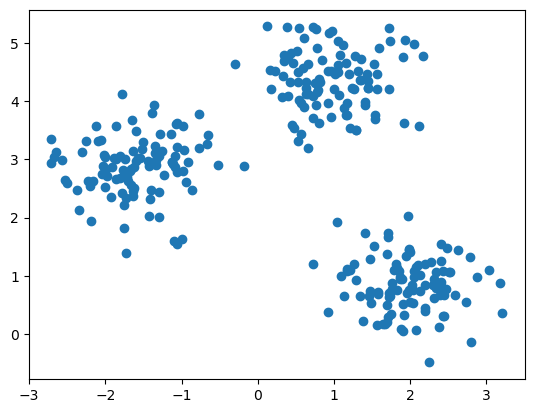

In [95]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Execute uma clusterização `KMeans` e visualize o resultado, explique se o resultado é razoável.


---

**Resposta**

In [96]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

C:\Users\Lucca O. Claro\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

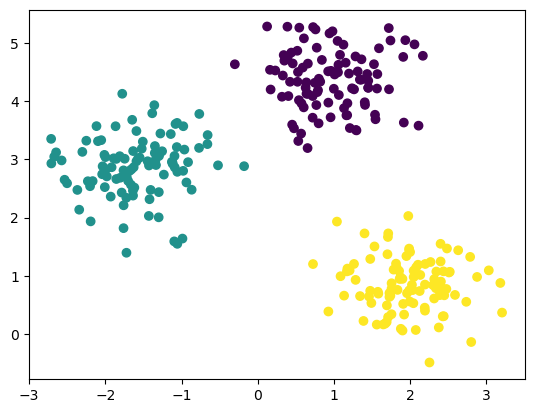

In [97]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.show()

O resultado é razoável, já que há 3 grupos, visualmente, corretamente separados

---

(b) (0.5 pts) Calcule o *silhouette score* do seu clustering (`sklearn.metrics.silhouette_score`)


---

**Resposta**

In [98]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.716534980258917

---

(c) (0.5 pts) Agora vamos multiplicar a primeira coluna de $X$ por $10000$

In [99]:
X_bad = X.copy()
X_bad[:, 0] = X_bad[:, 0] * 10_000

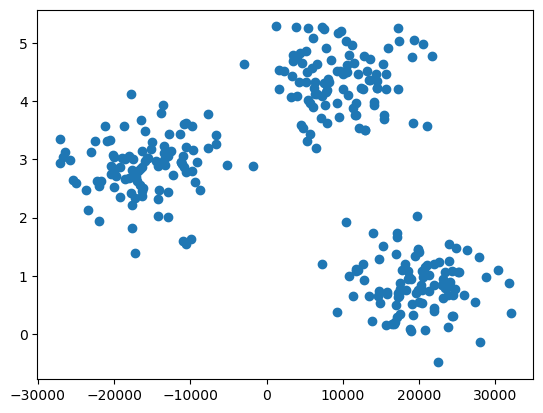

In [100]:
plt.figure()
plt.scatter(X_bad[:, 0], X_bad[:, 1])
plt.show()

Execute uma clusterização `KMeans` neste novo dataset e explique se o resultado é uma clusterização razoável.


---

**Resposta**

In [101]:
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_bad.fit(X_bad)

C:\Users\Lucca O. Claro\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

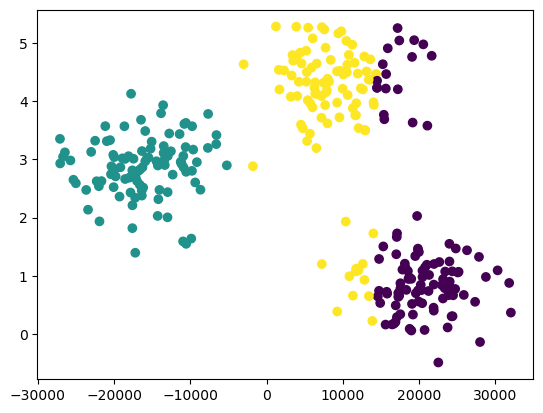

In [102]:
plt.figure()
plt.scatter(X_bad[:, 0], X_bad[:, 1], c=kmeans_bad.labels_)
plt.show()

O resultado não é razoável, já que há 3 grupos, visualmente, incorretamente separados

---

(d) (0.5 pts) Calcule o *silhouette score* do seu novo clustering e compare com o score do item (b)


---

**Resposta**

In [103]:
from sklearn.metrics import silhouette_score

silhouette_score(X_bad, kmeans_bad.labels_)

0.6442620192976386

A score do primeiro é mais alta do que a do segundo, pois a escala dos dados influencia no cálculo da distância entre os pontos.

---

**Questão 4** (3.5 pts) Regressão

(a) (0.5 pts) Explique porque ao construir a equação normal temos que adicionar uma coluna de $1\text{s}$ na matriz $X$.


---

**Resposta**

A coluna de 1s na matriz X permite que o coeficiente independente apareça na regressão, o que permite que a reta não seja forçada a passar pela origem. O que melhora os ajustes dos dados e o resultado da regressão.

---

(b) (3.0 pts) Construa um projeto de regressão sobre os dados do dataset "Liver disorders" do OpenML (https://www.openml.org/search?type=data&status=active&id=8). Para sua conveniência eu já salvei os dados em um arquivo *pickle*:

In [33]:
import pickle

with open('liver.pkl', 'rb') as f:
    data = pickle.load(f)

In [34]:
data.keys(), data.target

(dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']),
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 340    12.0
 341    12.0
 342    15.0
 343    16.0
 344    20.0
 Name: drinks, Length: 345, dtype: float64)

In [35]:
print(data.DESCR)

**Author**: BUPA Medical Research Ltd. Donor: Richard S. Forsyth   
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Liver+Disorders) - 5/15/1990  
**Please cite**: 

**BUPA liver disorders**
 
The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption.  Each line in the dataset constitutes the record of a single male individual. 

**Important note:** The 7th field (selector) has been widely misinterpreted in the past as a dependent variable representing presence or absence of a liver disorder. This is incorrect [1]. The 7th field was created by BUPA researchers as a train/test selector. It is not suitable as a dependent variable for classification. The dataset does not contain any variable representing presence or absence of a liver disorder. Researchers who wish to use this dataset as a classification benchmark should follow the method used in experiments by the donor (Forsyth & Rada, 198

In [36]:
data.frame

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


Itens a serem avaliados:

- Análise exploratória (1.0 pt)
- Feature engineering (apenas se realmente necessário) e construção do modelo (1.0 pt)
- Análise de desempenho (split treino-teste, métricas de desempenho, etc. Não me importa se o erro vai ser baixo, quero ver se a técnica é correta.) (1.0 pt)

Boa prova!


---

**Resposta**

In [37]:
from sklearn.datasets import fetch_openml

In [38]:
data = fetch_openml(name='liver-disorders', version=1)

In [39]:
X = data.data
y = data.target

In [40]:
X.shape, y.shape

((345, 5), (345,))

In [41]:
data.frame.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


In [42]:
df = data.frame

In [43]:
df[df["gammagt"] > 150].sort_values("gammagt", ascending=False)

,mcv,alkphos,sgpt,sgot,gammagt,drinks
84,92,60,30,27,297,2.0
330,95,73,20,25,225,8.0
315,99,86,58,42,203,6.0
322,102,82,34,78,203,7.0
341,96,69,53,43,203,12.0
189,94,83,81,34,201,20.0
178,92,95,85,48,200,8.0
114,90,96,34,49,169,4.0
232,98,74,148,75,159,0.5
76,87,90,43,28,156,2.0


In [44]:
df[df["sgpt"] > 120].sort_values("gammagt", ascending=False)

,mcv,alkphos,sgpt,sgot,gammagt,drinks
232,98,74,148,75,159,0.5
299,94,43,154,82,121,4.0
35,91,72,155,68,82,0.5


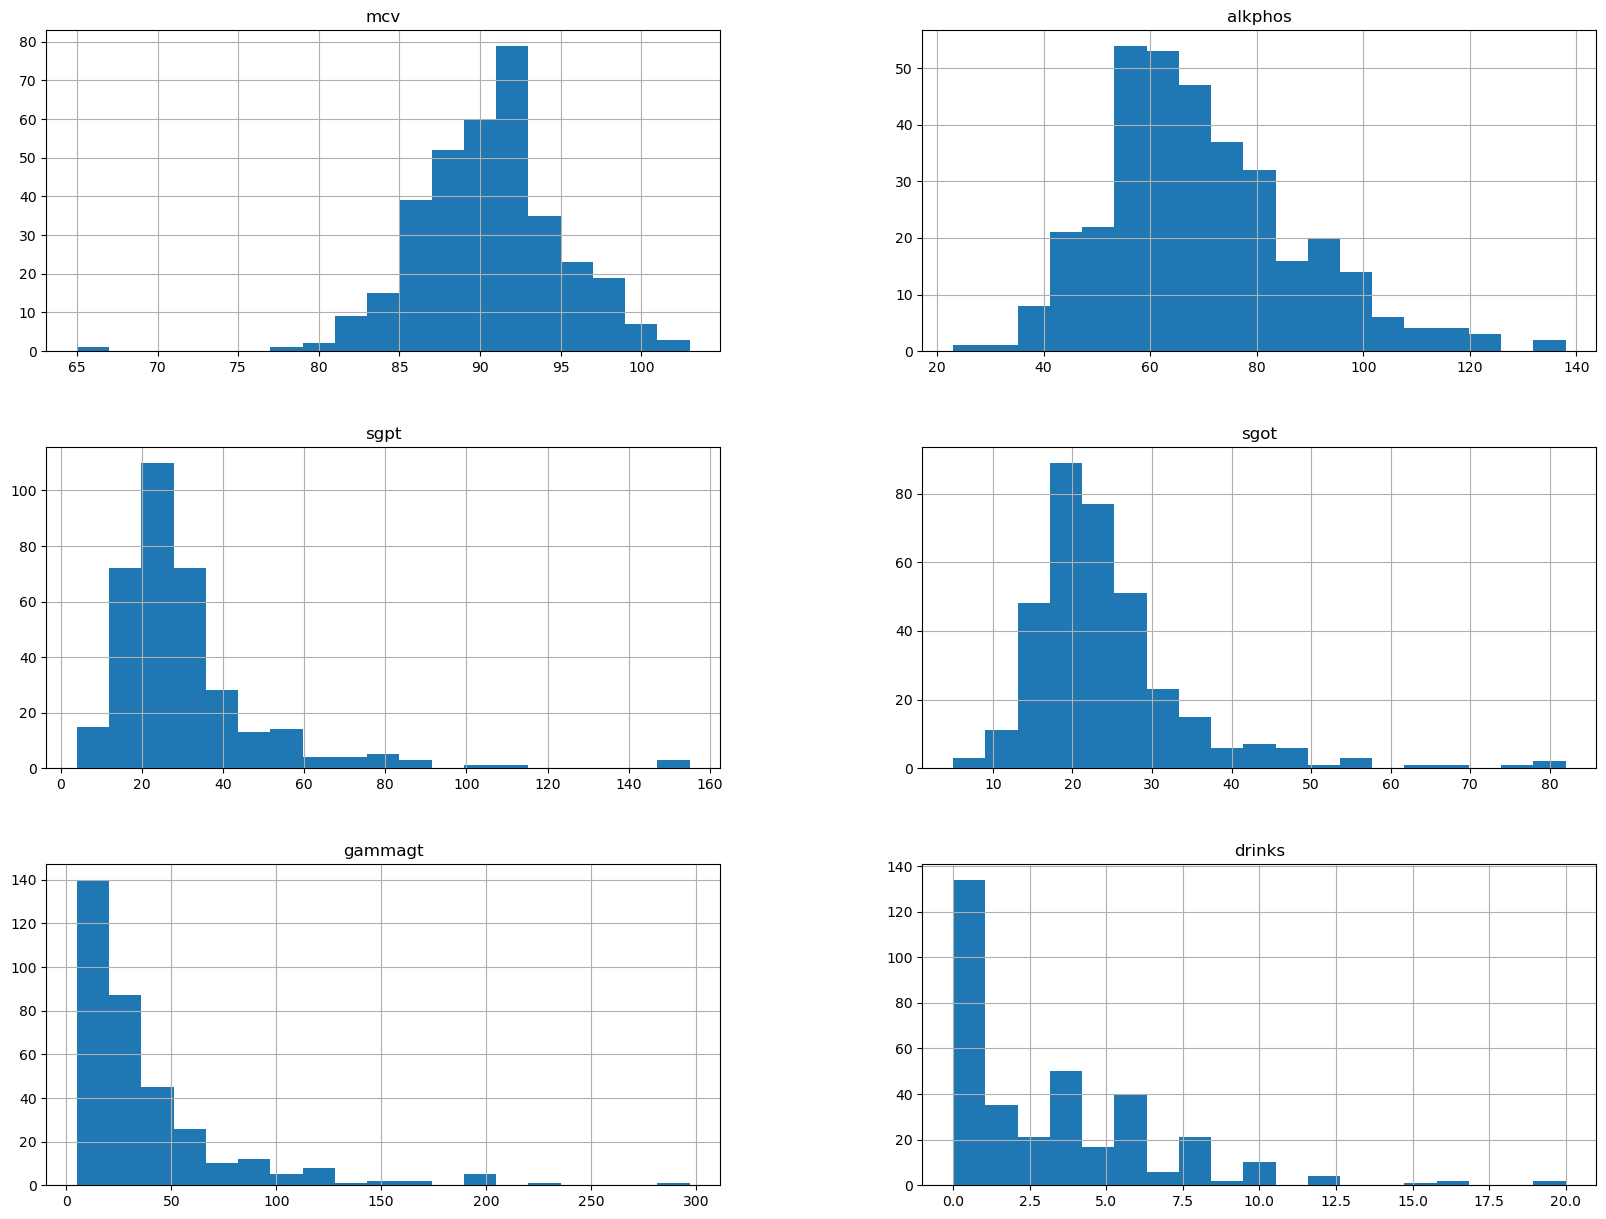

In [45]:
df.hist(bins=19, figsize=(20, 15))
plt.show()

In [46]:
df['gammagt'] = df['gammagt'].apply(np.log10)
df["drinks"] = df['drinks'].apply(np.log1p)

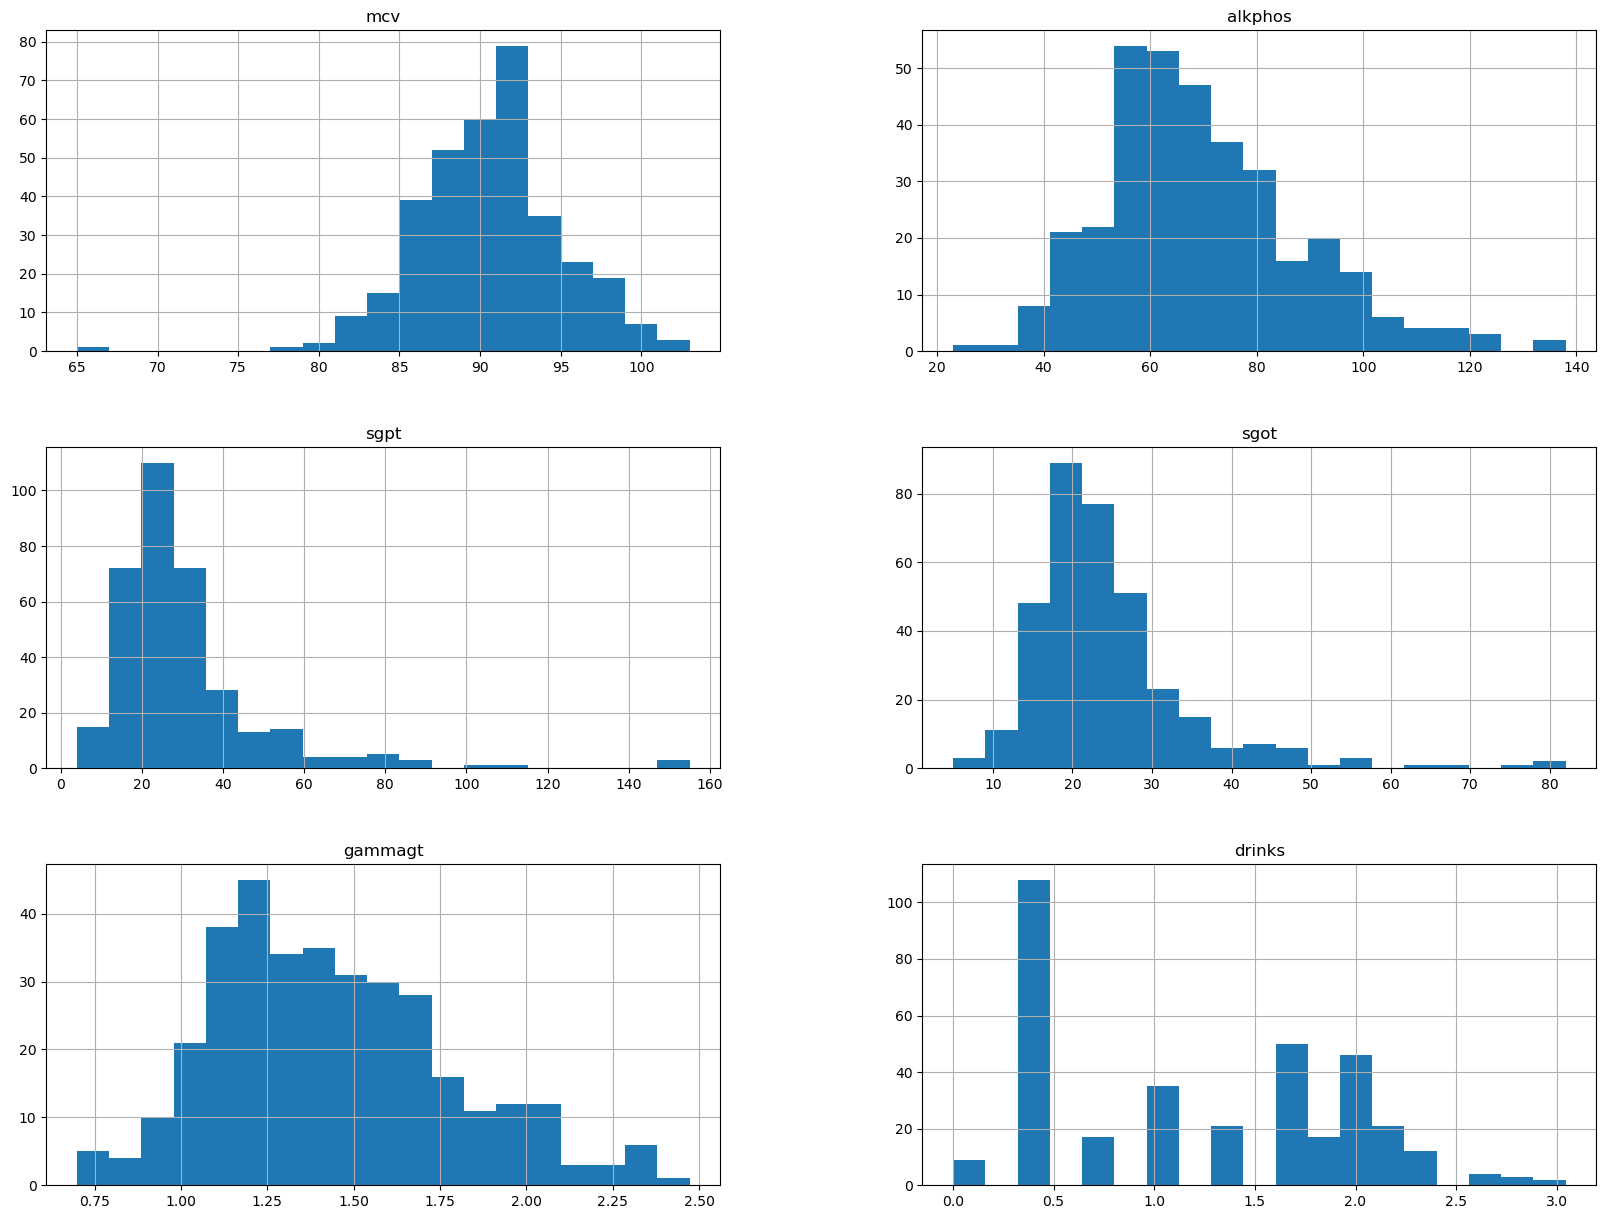

In [47]:
df.hist(bins=19, figsize=(20, 15))
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 5), (69, 5), (276,), (69,))

In [49]:
def clean_data(X, y):
    df = pd.DataFrame(X, columns=data['feature_names'])
    df['drinks'] = y
    
    df['gammagt'] = df['gammagt'].apply(np.log10)
    df["drinks"] = df['drinks'].apply(np.log1p)

    X = df.drop('drinks', axis=1).copy().values
    y = df['drinks'].copy().values

    return X, y

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

In [50]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
)

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_val)

In [53]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.6237378002409372

In [54]:
100*(np.exp(rmse) - 1)

86.5889345405317

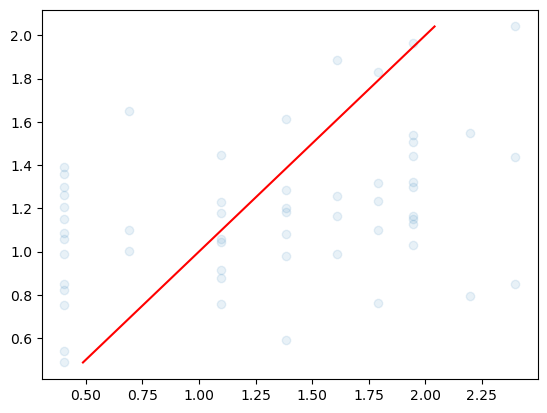

In [55]:
x_aux = np.linspace(y_pred.min(), y_pred.max(), 100)

plt.plot(x_aux, x_aux, color='red')
plt.scatter(y_val, y_pred, alpha=0.1)


In [57]:
X_train_augmented = np.c_[np.ones((X_train.shape[0], 1)), X_train]

In [61]:
model.intercept_, model.coef_

(-3.54424003670249,
 array([ 0.04110456, -0.00165056, -0.00645069,  0.01438461,  0.69777565]))

In [62]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1e-3)

model.fit(X_train, y_train)

model.intercept_, model.coef_

(-3.5442357282298946,
 array([ 0.04110498, -0.00165053, -0.00645043,  0.01438503,  0.69773322]))

Training Error (RMSE): 0.6278997252529014
Validation Error (RMSE): 0.9125190087476442


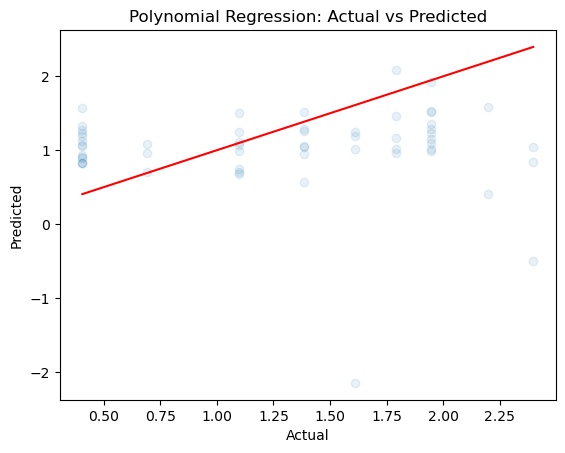

In [68]:
from sklearn.preprocessing import PolynomialFeatures


# Assuming X_train and y_train are already defined
# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict on the training set
y_poly_pred_train = poly_model.predict(X_poly_train)

# Calculate the training error
train_error = root_mean_squared_error(y_train, y_poly_pred_train)
print(f"Training Error (RMSE): {train_error}")

# Predict on the validation set
X_poly_val = poly.transform(X_val)
y_poly_pred_val = poly_model.predict(X_poly_val)

# Calculate the validation error
val_error = root_mean_squared_error(y_val, y_poly_pred_val)
print(f"Validation Error (RMSE): {val_error}")

# Plot the results
plt.scatter(y_val, y_poly_pred_val, alpha=0.1)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()

In [ ]:
One hot Encoding 
pd.get_dummies(df, columns=['Category'])